Analysis of this data:
1. Cloudiness appears to be relatively unrrelated to latitude. 
2. There is a strong relationship between temperature and latitude. Cities closer to the equator have a higher temperature, and temperature decreases in cities farther away from the equator.
3. Wind speed also appears to be relatively unrelated to latitude.
4. One limitation of this data is that it is calling for data from cities, which means that there will be more data available from areas with more cities. This limitation is noticeable in the fact that there is no data below -80 degrees latitude. Similarly, there may be more data from the northern hemisphere because almost 2/3 of the world's land mass is in the northern hemisphere. This may skew our observations into thinking that there are trends that may not actually exist. 

In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json

# Import API key
from config import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

Perform API calls

In [3]:
# Build query Url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = api_keys
units = "imperial"

query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

In [4]:
#Create empty lists to hold data
weather = []
cities_list = []

#Counters
count_record = 0

#Loop and pull data on each city
for city in cities:
    count_record += 1
    print(f"Record processing for {count_record} for the city: {city}")
    response = requests.get(query_url + city).json()
    city_id = response.get("id")
    
    if response.get("id"):
        print(f"Record found for: {city} and city id: {city_id}")
        weather.append(response)
        cities_list.append(city)
        
    else:
        print(f"No data for this city")

Record processing for 1 for the city: plettenberg bay
Record found for: plettenberg bay and city id: 964712
Record processing for 2 for the city: atuona
Record found for: atuona and city id: 4020109
Record processing for 3 for the city: geraldton
Record found for: geraldton and city id: 5960603
Record processing for 4 for the city: mulege
Record found for: mulege and city id: 3995236
Record processing for 5 for the city: butaritari
Record found for: butaritari and city id: 2110227
Record processing for 6 for the city: broome
Record found for: broome and city id: 2656067
Record processing for 7 for the city: pervomayskoye
Record found for: pervomayskoye and city id: 1495256
Record processing for 8 for the city: albany
Record found for: albany and city id: 5106834
Record processing for 9 for the city: wukari
Record found for: wukari and city id: 2318921
Record processing for 10 for the city: vinstra
Record found for: vinstra and city id: 3131538
Record processing for 11 for the city: cap

Record found for: castro and city id: 3896218
Record processing for 92 for the city: mahebourg
Record found for: mahebourg and city id: 934322
Record processing for 93 for the city: maymyo
Record found for: maymyo and city id: 1309937
Record processing for 94 for the city: dikson
Record found for: dikson and city id: 1507390
Record processing for 95 for the city: provideniya
Record found for: provideniya and city id: 4031574
Record processing for 96 for the city: price
Record found for: price and city id: 5545269
Record processing for 97 for the city: karistos
No data for this city
Record processing for 98 for the city: zhezkazgan
Record found for: zhezkazgan and city id: 1516589
Record processing for 99 for the city: bambous virieux
Record found for: bambous virieux and city id: 1106677
Record processing for 100 for the city: abu dhabi
Record found for: abu dhabi and city id: 292968
Record processing for 101 for the city: sorvag
No data for this city
Record processing for 102 for the 

No data for this city
Record processing for 180 for the city: srednekolymsk
Record found for: srednekolymsk and city id: 2121025
Record processing for 181 for the city: matamoros
Record found for: matamoros and city id: 3523466
Record processing for 182 for the city: barguzin
Record found for: barguzin and city id: 2027109
Record processing for 183 for the city: lagoa
Record found for: lagoa and city id: 2267254
Record processing for 184 for the city: longyearbyen
Record found for: longyearbyen and city id: 2729907
Record processing for 185 for the city: sparks
Record found for: sparks and city id: 5512862
Record processing for 186 for the city: kendari
Record found for: kendari and city id: 1640344
Record processing for 187 for the city: bolungarvik
No data for this city
Record processing for 188 for the city: lexington
Record found for: lexington and city id: 4297983
Record processing for 189 for the city: maarianhamina
No data for this city
Record processing for 190 for the city: ok

Record found for: diapaga and city id: 2361373
Record processing for 267 for the city: olinda
Record found for: olinda and city id: 3650121
Record processing for 268 for the city: bengkulu
No data for this city
Record processing for 269 for the city: verdalsora
No data for this city
Record processing for 270 for the city: westpunt
No data for this city
Record processing for 271 for the city: pevek
Record found for: pevek and city id: 2122090
Record processing for 272 for the city: bonfim
Record found for: bonfim and city id: 3379316
Record processing for 273 for the city: salinas
Record found for: salinas and city id: 5391295
Record processing for 274 for the city: masvingo
Record found for: masvingo and city id: 886763
Record processing for 275 for the city: nisia floresta
Record found for: nisia floresta and city id: 3393922
Record processing for 276 for the city: polis
Record found for: polis and city id: 146137
Record processing for 277 for the city: santa justina
No data for this 

Record found for: saint-augustin and city id: 3031582
Record processing for 353 for the city: ixtapa
Record found for: ixtapa and city id: 4004293
Record processing for 354 for the city: champerico
Record found for: champerico and city id: 3530097
Record processing for 355 for the city: amot
Record found for: amot and city id: 3163198
Record processing for 356 for the city: ketchikan
Record found for: ketchikan and city id: 5554428
Record processing for 357 for the city: ahipara
Record found for: ahipara and city id: 2194098
Record processing for 358 for the city: bandarbeyla
Record found for: bandarbeyla and city id: 64814
Record processing for 359 for the city: warqla
No data for this city
Record processing for 360 for the city: port hardy
Record found for: port hardy and city id: 6111862
Record processing for 361 for the city: cockburn town
Record found for: cockburn town and city id: 3576994
Record processing for 362 for the city: ilo
Record found for: ilo and city id: 3938415
Reco

Record found for: kirzhach and city id: 548278
Record processing for 439 for the city: mount gambier
Record found for: mount gambier and city id: 2156643
Record processing for 440 for the city: chiang khong
Record found for: chiang khong and city id: 1611197
Record processing for 441 for the city: bloomingdale
Record found for: bloomingdale and city id: 4885156
Record processing for 442 for the city: vardo
Record found for: vardo and city id: 4372777
Record processing for 443 for the city: constantine
Record found for: constantine and city id: 2501152
Record processing for 444 for the city: komsomolets
Record found for: komsomolets and city id: 545747
Record processing for 445 for the city: raga
No data for this city
Record processing for 446 for the city: moron
Record found for: moron and city id: 3631878
Record processing for 447 for the city: cheuskiny
No data for this city
Record processing for 448 for the city: kathmandu
Record found for: kathmandu and city id: 1283240
Record proc

Record found for: san carlos and city id: 3628503
Record processing for 526 for the city: sidmouth
Record found for: sidmouth and city id: 2637853
Record processing for 527 for the city: urengoy
Record found for: urengoy and city id: 1488414
Record processing for 528 for the city: konongo
Record found for: konongo and city id: 2299349
Record processing for 529 for the city: borama
No data for this city
Record processing for 530 for the city: omboue
Record found for: omboue and city id: 2396853
Record processing for 531 for the city: hobyo
Record found for: hobyo and city id: 57000
Record processing for 532 for the city: gravdal
Record found for: gravdal and city id: 3147822
Record processing for 533 for the city: tazovskiy
Record found for: tazovskiy and city id: 1489853
Record processing for 534 for the city: tidore
No data for this city
Record processing for 535 for the city: krasnoselkup
No data for this city
Record processing for 536 for the city: dharchula
Record found for: dharch

Record found for: casablanca and city id: 2553604
Record processing for 614 for the city: bilma
Record found for: bilma and city id: 2446796
Record processing for 615 for the city: dobrinka
Record found for: dobrinka and city id: 565857
Record processing for 616 for the city: kemin
Record found for: kemin and city id: 1528606
Record processing for 617 for the city: hambantota
Record found for: hambantota and city id: 1244926
Record processing for 618 for the city: faridpur
Record found for: faridpur and city id: 1271947
Record processing for 619 for the city: pangkalanbuun
Record found for: pangkalanbuun and city id: 1632694
Record processing for 620 for the city: labuhan
Record found for: labuhan and city id: 1641899
Record processing for 621 for the city: woodward
Record found for: woodward and city id: 4556050
Record processing for 622 for the city: weiser
Record found for: weiser and city id: 5611730
Record processing for 623 for the city: xam nua
Record found for: xam nua and city

In [5]:
len(weather)

555

In [6]:
#Create variables for each of the parameters we want
country_city = [data.get("sys").get("country") for data in weather]
lat_city = [data.get("coord").get("lat") for data in weather]
wind_city = [data.get("wind").get("speed") for data in weather]
clouds_city = [data.get("clouds").get("all") for data in weather]
hum_city = [data.get("main").get("humidity") for data in weather]
temp_city = [data.get("main").get("temp") for data in weather]

In [7]:
#Append the list
weather_data = pd.DataFrame({"City": cities_list,
                "Country": country_city,
                "Latitude": lat_city,
                "Wind Speed": wind_city,
                "Cloudiness": clouds_city,
                "Humidity": hum_city,
                "Temperature": temp_city})

weather_data.head()

,City,Country,Latitude,Wind Speed,Cloudiness,Humidity,Temperature
0,plettenberg bay,ZA,-34.05,17.25,0,100,60.29
1,atuona,PF,-9.80,12.44,0,100,79.73
2,geraldton,CA,49.72,4.70,90,74,35.60
3,mulege,MX,26.88,9.75,0,77,78.29
4,butaritari,KI,3.07,3.71,76,100,84.50


In [10]:
#Create an output file
weather_data.to_csv("weather_data.csv", index=False)

Temperature (F) vs. Latitude

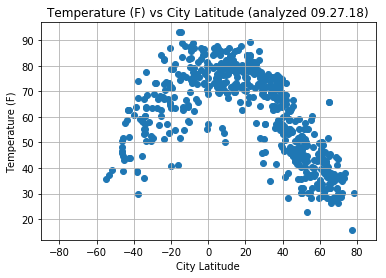

In [8]:
plt.scatter(weather_data["Latitude"], weather_data["Temperature"])

plt.title("Temperature (F) vs City Latitude (analyzed 09.27.18)")
plt.ylabel("Temperature (F)")
plt.xlabel("City Latitude")
plt.xlim(-90, 90)
plt.grid()

plt.savefig("Temp vs. Lat.png")

Humidity (%) vs. Latitude

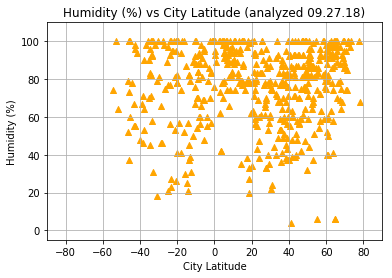

In [9]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="^", color="orange")

plt.title("Humidity (%) vs City Latitude (analyzed 09.27.18)")
plt.ylabel("Humidity (%)")
plt.xlabel("City Latitude")
plt.xlim(-90, 90)
plt.ylim(-5, 110)
plt.grid()

plt.savefig("Humid vs. Lat.png")

Cloudiness (%) vs. Latitude

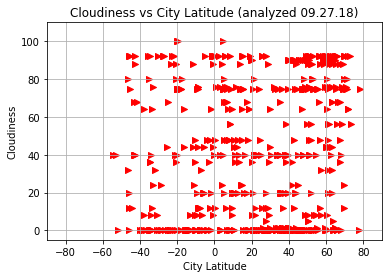

In [10]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker=">", color="red")

plt.title("Cloudiness vs City Latitude (analyzed 09.27.18)")
plt.ylabel("Cloudiness")
plt.xlabel("City Latitude")
plt.xlim(-90, 90)
plt.ylim(-5, 110)
plt.grid()

plt.savefig("Cloud vs. Lat.png")

Wind Speed (mph) vs. Latitude

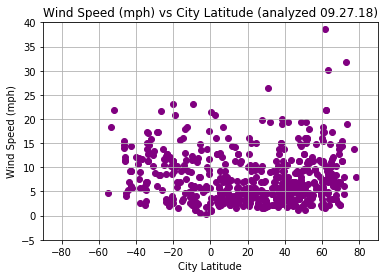

In [11]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o", color="purple")

plt.title("Wind Speed (mph) vs City Latitude (analyzed 09.27.18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("City Latitude")
plt.xlim(-90, 90)
plt.ylim(-5, 40)
plt.grid()

plt.savefig("Wind vs. Lat.png")